## Grant E. Walker Jr
## Project: Real-time Fashion Image Generation using GANs with TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

            

## Define the Generator and Discriminator Networks

In [2]:
# Define generator network
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

# Define discriminator network
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    return model


## Define Loss Functions and Optimizers

In [3]:
# Define loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Define generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


## Define Training Functions

In [4]:
# Training step function with history tracking
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Training function with history tracking
def train(dataset, epochs):
    gen_loss_history = []
    disc_loss_history = []

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i in range(0, len(dataset), BATCH_SIZE):
            image_batch = dataset[i:i+BATCH_SIZE]
            gen_loss, disc_loss = train_step(image_batch)
            gen_loss_history.append(gen_loss)
            disc_loss_history.append(disc_loss)
    
    return gen_loss_history, disc_loss_history


## Train the GAN

In [5]:
# Set up training parameters
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16
BATCH_SIZE = 128

# Generate seed for sampling during training
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Instantiate the generator and discriminator networks
generator = make_generator_model()
discriminator = make_discriminator_model()

# Train the model
train(train_images, EPOCHS)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

([<tf.Tensor: shape=(), dtype=float32, numpy=0.7151185>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.6958098>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.6775759>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.6589817>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.6503701>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.6388774>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.6291039>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.622477>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.6059007>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.600878>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.5975034>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.58264196>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.5737548>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.5635364>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.55123645>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.5353984>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.52722406>,
  <tf.Tensor: shape=(), dtype=

## Generate Samples

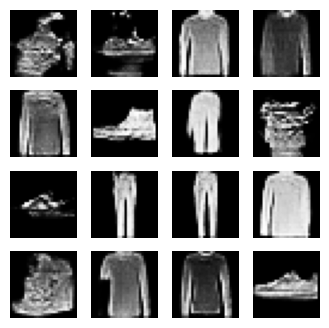

In [7]:
# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

generate_and_save_images(generator, EPOCHS, seed)


## Summary

This project involves training a Generative Adversarial Network (GAN) using TensorFlow. It generates new images of clothing items based on the Fashion MNIST dataset. The process includes defining network architectures, implementing the training loop, visualizing training progress, and tracking loss history. The goal is to demonstrate GAN training, TensorFlow usage, and real-time visualization for image generation tasks.